# Observations and Insights

In [286]:
#import library dependencies and setup file
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
import matplotlib.ticker as ticker
import matplotlib.animation as animation
from scipy.stats import linregress


#research study files
mouse_metadata = "data/Mouse_metadata.csv"
study_results = "data/Study_results.csv"

#read research data to analyze the study results
mouse_data = pd.read_csv(mouse_metadata)
results = pd.read_csv(study_results)

#Combine the data tables into a single dataset
pyarm_data = pd.merge(mouse_data, results, how="left", on=["Mouse ID","Mouse ID"])

In [287]:
#Calculate the number of mice in the DataFrame, which is 249
mice = len(pyarm_data["Mouse ID"].unique())

In [288]:
#Calculate the duplicate mice by ID number that shows up for Mouse ID and Timepoint, which is 1893
timepoints = pyarm_data["Mouse ID"].count()

In [289]:
#Find all the data for the duplicate mouse ID, which is "g989"
duplicate = pyarm_data.loc[pyarm_data.duplicated(subset=['Mouse ID', 'Timepoint',]),'Mouse ID'].unique()

In [290]:
#Build DataFrame by dropping the duplicate mouse by its ID
study = pyarm_data[pyarm_data['Mouse ID'].isin(duplicate)==False]

In [291]:
#Find the number of mice in the clean DataFrame, which is 1880
micecount = study["Mouse ID"].count()

## Summary Statistics

In [292]:
#Calculalte and place mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
study_summary = study.groupby('Drug Regimen').agg(Mean=('Tumor Volume (mm3)','mean'),
                                                  Median=('Tumor Volume (mm3)','median'),
                                                  Variance=('Tumor Volume (mm3)','var'),
                                                  StandardDeviation=('Tumor Volume (mm3)','std'),
                                                  SEM=('Tumor Volume (mm3)','sem'))

#rename column and update format of summary statistics table
study_summary.rename(columns={'StandardDeviation':'Standard Deviation'}).style.set_properties(**{'text-align':'left'})

,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar Plots

In [293]:
#Find data for bar plot on the number of mice per point for each treatment
zero = study[study['Timepoint'] == 0].groupby('Drug Regimen').count()['Mouse ID']
five = study[study['Timepoint'] == 5].groupby('Drug Regimen').count()['Mouse ID']
ten = study[study['Timepoint'] == 10].groupby('Drug Regimen').count()['Mouse ID']
fifteen = study[study['Timepoint'] == 15].groupby('Drug Regimen').count()['Mouse ID']
twenty = study[study['Timepoint'] == 20].groupby('Drug Regimen').count()['Mouse ID']
twentyfive = study[study['Timepoint'] == 25].groupby('Drug Regimen').count()['Mouse ID']
thirty = study[study['Timepoint'] == 30].groupby('Drug Regimen').count()['Mouse ID']
thirtyfive = study[study['Timepoint'] == 35].groupby('Drug Regimen').count()['Mouse ID']
forty = study[study['Timepoint'] == 40].groupby('Drug Regimen').count()['Mouse ID']
fortyfive = study[study['Timepoint'] == 45].groupby('Drug Regimen').count()['Mouse ID']
timepoint_total = study.groupby('Drug Regimen').count()['Mouse ID']

In [294]:
#Create dataframe of data
bar = pd.DataFrame({"0":zero,
                    "5":five,
                    "10":ten,
                    "15":fifteen,
                    "20":twenty,
                    "25":twentyfive,
                    "30":thirty,
                    "35":thirtyfive,
                    "40":forty,
                    "45":fortyfive,
                    "Total":timepoint_total})

In [295]:
bar

,0,5,10,15,20,25,30,35,40,45,Total
Drug Regimen,,,,,,,,,,,
Capomulin,25,25,25,24,23,22,22,22,21,21,230
Ceftamin,25,21,20,19,18,18,16,14,14,13,178
Infubinol,25,25,21,21,20,18,17,12,10,9,178
Ketapril,25,23,22,19,19,19,18,17,15,11,188
Naftisol,25,23,21,21,20,18,15,15,15,13,186
Placebo,25,24,24,20,19,17,15,14,12,11,181
Propriva,24,23,21,15,15,13,12,9,9,7,148
Ramicane,25,25,24,24,23,23,23,21,20,20,228
Stelasyn,24,23,21,21,19,18,17,15,12,11,181


In [296]:
#Timepoints per treatment drug regimen check
plot = study.groupby(["Drug Regimen"]).count()["Mouse ID"]

In [297]:
#Drug regimen mice count by timepoint check
counted = study.groupby(["Drug Regimen","Timepoint"]).size()

In [298]:
#Drug regimen mice count by timepoint check in dataframe
time = study.groupby(["Drug Regimen","Timepoint"])
time_table = pd.DataFrame(time.size())

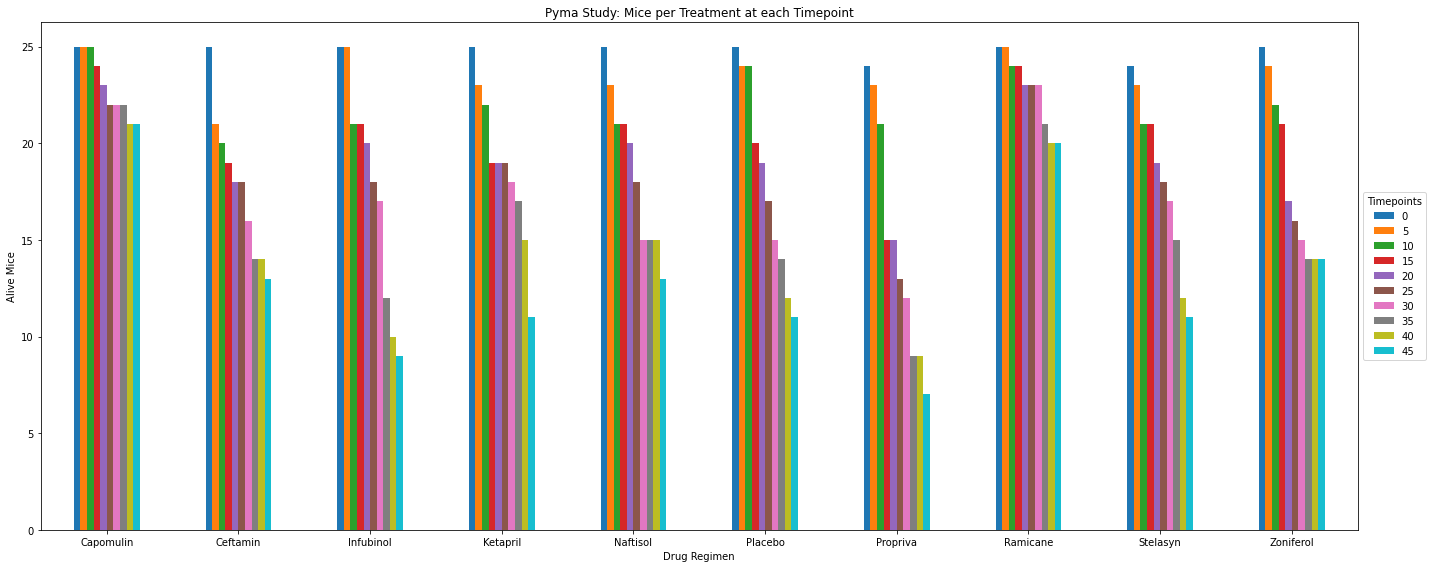

In [299]:
#Remove Total column
del bar['Total']

#Create Pandas Bar Plot on the number of mice per timepoint for each drug regimen treatment
ax = bar.plot.bar(rot=0,figsize=(20,8))
plt.title("Pyma Study: Mice per Treatment at each Timepoint")
plt.ylabel("Alive Mice")
plt.legend(title="Timepoints",loc='center left',bbox_to_anchor=(1.0,0.5))

#Save Pandas Bar Plot
plt.tight_layout()
plt.savefig("Images/pandas_bar_plot.png")
plt.show()

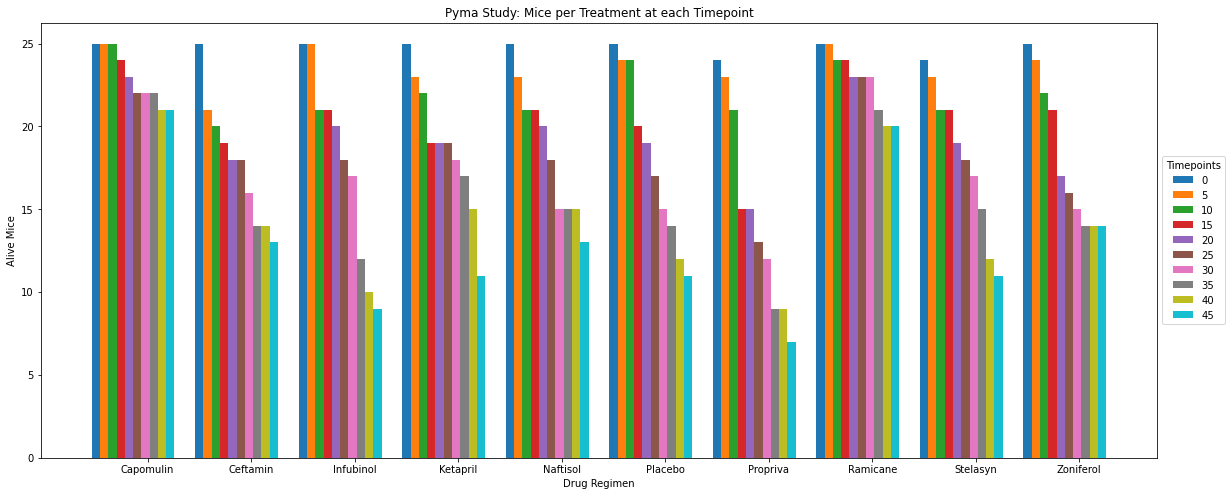

In [300]:
#Create Pyplot Bar Plot on the number of mice per timepoint for each drug regimen treatment
fig, ax = plt.subplots(figsize=(20,8))
xaxis = np.arange(len(bar))
barwidth = 0.08

for i, col in enumerate(bar.columns):
    plt.bar(xaxis+(-0.5+i*barwidth),bar[col],width=barwidth,label=col)

#Rename x axis data to drug regimen treatments
treatments = [value for value in xaxis]
plt.xticks(treatments, ['Capomulin', 'Ceftamin', 'Infubinol', 'Ketapril', 'Naftisol', 'Placebo', 'Propriva', 'Ramicane', 'Stelasyn', 'Zoniferol'])

#Format Pyplot Bar Plot
plt.title("Pyma Study: Mice per Treatment at each Timepoint")
plt.ylabel("Alive Mice")
plt.xlabel("Drug Regimen")
plt.legend(title="Timepoints",loc='center left',bbox_to_anchor=(1.0,0.5))
plt.show()

## Pie Plots

In [307]:
#Calculate number of unique mice, which is 248
uniquemice = study["Mouse ID"].nunique()

In [308]:
#Pull mice and sex data for pie plots
sex = study.groupby(["Mouse ID","Sex"])
sex_table = pd.DataFrame(sex.size())

In [309]:
#Calculate unique mice's sex
study_gender = pd.DataFrame(sex_table.groupby(["Sex"]).count())
study_gender.columns = ["Mice Count"]

#Calculate and place unique mice's sex percentage
study_gender["Percentage"] = ((study_gender["Mice Count"]/uniquemice)*100) 
study_gender["Percentage"] = study_gender["Percentage"]

In [310]:
study_gender

,Mice Count,Percentage
Sex,,
Female,123,49.596774
Male,125,50.403226


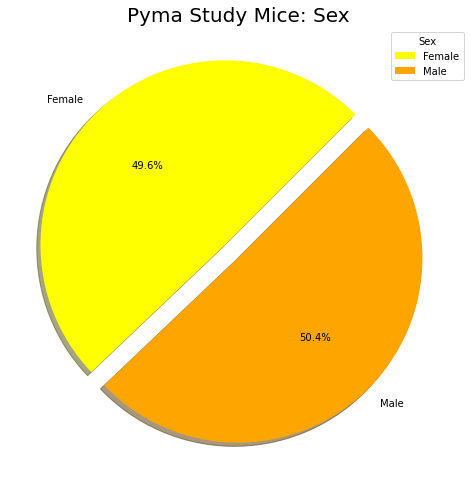

In [323]:
#Create and format a pie plot of study gender data using pandas
colors = ['yellow','orange']
explode = (0.1,0)
pieplot = study_gender.plot.pie(y='Mice Count',
                                figsize=(14,7),colors = colors,startangle=45,
                                explode = explode, shadow=True, autopct="%1.1f%%")
plt.title('Pyma Study Mice: Sex',fontsize = 20)
plt.ylabel('',fontsize = 16)
plt.legend(title="Sex")

#Save Pandas Pie Plot
plt.tight_layout()
plt.savefig("Images/pandas_pie_plot.png")
plt.show()

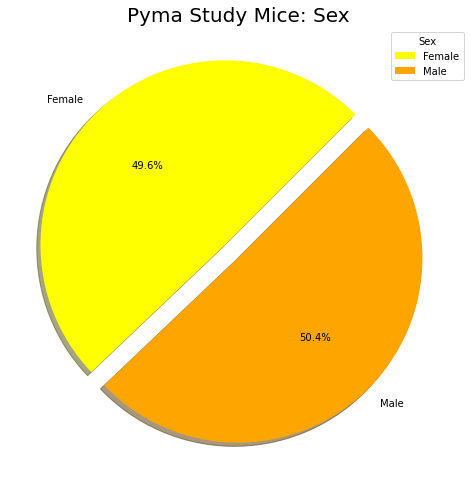

In [324]:
#Create and format a pie plot of study gender data using pyplot
labels = ["Female","Male"]
fig, ax = plt.subplots(figsize=(14,7))
ax.pie(study_gender["Percentage"],labels=labels, colors=colors, shadow=True, explode=explode, startangle=45, autopct='%1.1f%%')
plt.title('Pyma Study Mice: Sex',fontsize = 20)
plt.ylabel('',fontsize = 16)
plt.legend(title="Sex")


#Save Pandas Pie Plot
plt.tight_layout()
plt.savefig("Images/pandas_pie_plot.png")
plt.show()

## Quartiles, Outliers and Boxplots

In [ ]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. 
#Calculate the IQR and quantitatively determine if there are any potential outliers. 

In [ ]:


# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

## Line and Scatter Plots

In [ ]:


# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin


In [ ]:

# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen



## Correlation and Regression

In [ ]:

# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

